# Exercise Sheet 1: Introduction and Dimensionality Reduction
## Firstname Lastname
## Student ID


**Note:** If you use the jupyter notebook for your assignments, then you can hand in your exercises as **.pdf** or **.html** files (Download your submitted file to check if everything worked). For parts of the assignments that you would like to do in handwriting instead of tex you can either include a picture of it in the notebook or upload it separately.

In [67]:
# import libraries
import matplotlib.image as npim
import matplotlib.pyplot as plt
from scipy.linalg import svd
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA
import numpy as np

# define functions
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def svd_decomposition(img, n_vals):
    #TODO
    O, S, At = svd(img)
    i = img.shape[1] - n_vals
    
    while (i>0):
        min_S_index = np.argmin(S)
    
        S = np.delete(S, min_S_index)
        O = np.delete(O, min_S_index, 1)
        At = np.delete(At, min_S_index, 0)
        i-=1
    
    reconst_img = np.dot(O, np.dot(np.diag(S), At))
    return reconst_img

#More Info
#http://theautomatic.net/2018/06/23/ica-on-images-with-python/
def ica_decomposition(img, n_vals):
    #TODO
    fastica = FastICA(n_components=n_vals).fit(img)
    
    img_ica = fastica.fit_transform(img)
    reconst_img = fastica.inverse_transform(img_ica)
    return reconst_img

#More Info: 
#https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb
def kmeans_decomposition(img, n_vals):
    #TODO
    kmeans = KMeans(n_clusters = n_vals).fit(img)
    
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    return compressed_image

def reconstruction_loss(img, img_reconstruction):
    return (np.square(img - img_reconstruction)).mean()


(400, 400)


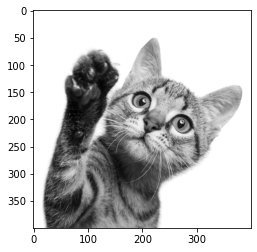

In [68]:
img = npim.imread("katze.png")
gray = rgb2gray(img)
print(gray.shape)
plt.imshow(gray,cmap="gray");

### Exercise 2-1
#### a)


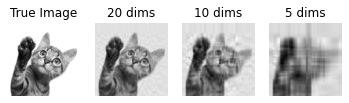

In [61]:
# example usage for SVD
Mhat1  = svd_decomposition(gray,20)
Mhat2 = svd_decomposition(gray,10)
Mhat3 = svd_decomposition(gray,5)

# Plot Images
titles = ["True Image", "20 dims", "10 dims", "5 dims"]
images = [gray, Mhat1, Mhat2, Mhat3]
fig, axes = plt.subplots(1, len(images))
for title_i, img_i, ax_i in zip(titles, images, axes):
    ax_i.axis('off')
    ax_i.imshow(img_i, cmap = plt.get_cmap('gray'))
    ax_i.set_title(title_i)
plt.show()


In [62]:
# Calculate Reconstruction Error
for rec in [Mhat1,Mhat2,Mhat3]:
    print("Reconstruction Loss: ", reconstruction_loss(gray, rec))

Reconstruction Loss:  0.0027598051098689925
Reconstruction Loss:  0.006212766439824713
Reconstruction Loss:  0.013667243663594848


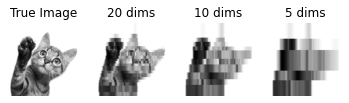

In [69]:
#17
Mhat1 = kmeans_decomposition(gray,20)
Mhat2 = kmeans_decomposition(gray,10)
Mhat3 = kmeans_decomposition(gray,5)

# Plot Images
titles = ["True Image", "20 dims", "10 dims", "5 dims"]
images = [gray, Mhat1, Mhat2, Mhat3]
fig, axes = plt.subplots(1, len(images))
for title_i, img_i, ax_i in zip(titles, images, axes):
    ax_i.axis('off')
    ax_i.imshow(img_i, cmap = plt.get_cmap('gray'))
    ax_i.set_title(title_i)
plt.show()

In [64]:
# Calculate Reconstruction Error
for rec in [Mhat1,Mhat2,Mhat3]:
    print("Reconstruction Loss: ", reconstruction_loss(gray, rec))

Reconstruction Loss:  0.006041820644123801
Reconstruction Loss:  0.010808223901794567
Reconstruction Loss:  0.019130743446073756


/Users/mahdyfalah/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


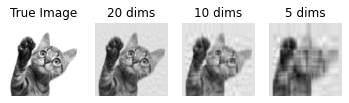

In [65]:
#18
Mhat1 = ica_decomposition(gray,20)
Mhat2 = ica_decomposition(gray,10)
Mhat3 = ica_decomposition(gray,5)

# Plot Images
titles = ["True Image", "20 dims", "10 dims", "5 dims"]
images = [gray, Mhat1, Mhat2, Mhat3]
fig, axes = plt.subplots(1, len(images))
for title_i, img_i, ax_i in zip(titles, images, axes):
    ax_i.axis('off')
    ax_i.imshow(img_i, cmap = plt.get_cmap('gray'))
    ax_i.set_title(title_i)
plt.show()

In [66]:
# Calculate Reconstruction Error
for rec in [Mhat1,Mhat2,Mhat3]:
    print("Reconstruction Loss: ", reconstruction_loss(gray, rec))

Reconstruction Loss:  0.0026283418462188257
Reconstruction Loss:  0.005704036008473231
Reconstruction Loss:  0.011306802846375707


In [76]:
kmeans = KMeans(n_clusters = 20).fit(gray)
    
compressed_image = kmeans.cluster_centers_[kmeans.labels_]

compressed_image.shape

kmeans.cluster_centers_.shape

(20, 400)

In [90]:
M=np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

M2 = np.array([(1, 2)])

M3 = M[M2]

M3

array([[[4, 5, 6],
        [7, 8, 9]]])